In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def plot_image(image,new_image,title_1="original",title_2="new image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

Linear Filtering
Filtering involves enhancing an image, for example removing the Noise from an image. Noise is caused by a bad camera or bad image compression. The same factors that cause noise may lead to blurry images, we can apply filters to sharpening these images. Convolution is a standard way to Filter an image the filter is called the kernel and different kernels perform different tasks. In addition, Convolution is used for many of the most advanced artificial intelligence algorithms. We simply take the dot product of the kernel and as an equally-sized portion of the image. We then shift the kernel and repeat.

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


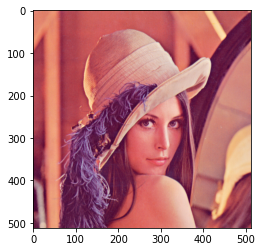

In [4]:
image=cv2.imread('lenna.png')
print(image)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

The images we are working with are comprised of RGB values which are values from 0 to 255. Zero means white noise, this makes the image look grainy:

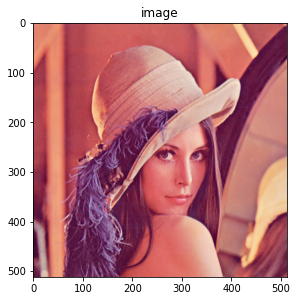

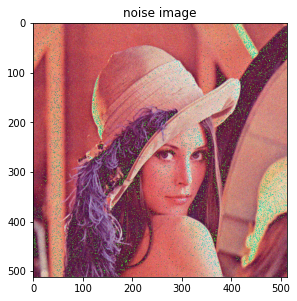

In [5]:
rows,cols,_=image.shape
# Creates values using a normal distribution with a mean of 0 and standard deviation of 15, the
#values are converted to unit8 which means the values are between 0 and 255
noise=np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)

noisy_image=image+noise
plot_image(image,noisy_image,"image","noise image")

When adding noise to an image sometimes the value might be greater than 255, in this case, 256, is subtracted from the value to wrap the number around keeping it between 0 and 255. For example, consider an image with an RGB value of 137 and we add noise with an RGB value of 215 we get an RGB value of 352. We then subtract 256, the total number of possible values between 0 and 255, to get a number between 0 and 255.

Filtering Noise
Smoothing filters average out the Pixels within a neighborhood, they are sometimes called low pass filters. For mean filtering, the kernel simply averages out the kernels in a neighborhood.

In [7]:
# Create a kernel which is a 6 by 6 array where each value is 1/36
kernel=np.ones((6,6))/36

The function filter2D performs 2D convolution between the image src and the kernel on each color channel independently. The parameter ddepth has to do with the size of the output image, we will set it to -1 so the input and output are the same size.

In [9]:
image_filterd=cv2.filter2D(src=noisy_image,ddepth=-1,kernel=kernel)

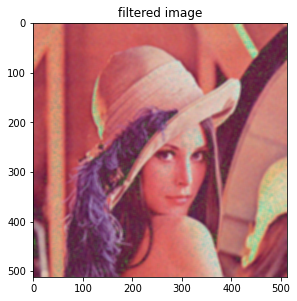

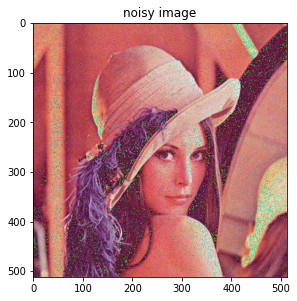

In [10]:
plot_image(image_filterd,noisy_image,"filtered image","noisy image")

A smaller kernel keeps the image sharp, but filters less noise, here we try a 4x4 kernel

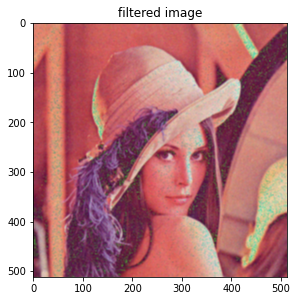

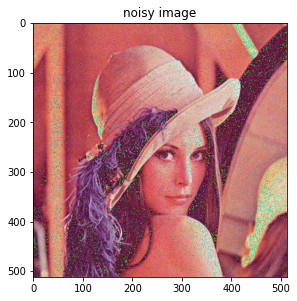

In [11]:
kernel=np.ones((4,4))/16
filtered_image=cv2.filter2D(noisy_image,ddepth=-1,kernel=kernel)
plot_image(filtered_image,noisy_image,"filtered image","noisy image")

Gaussian Blur¶
The function GaussianBlur convolves the source image with the specified Gaussian kernel It filters noise but does a better job of preserving the edges. It has the following parameters:

Parameters

src input image; the image can have any number of channels, which are processed independently

ksize: Gaussian kernel size

sigmaX Gaussian kernel standard deviation in the X direction

sigmaY Gaussian kernel standard deviation in the Y direction; if sigmaY is zero, it is set to be equal to sigmaX

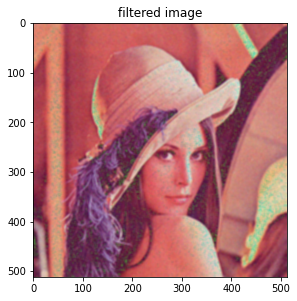

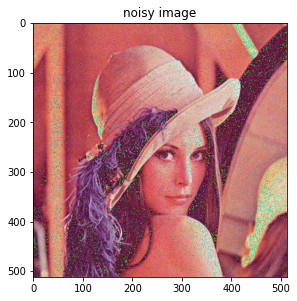

In [13]:
# filter the image using gaussian blur with noise using 4 by 4 kernel
image_filtered=cv2.GaussianBlur(noisy_image,(5,5),sigmaX=4,sigmaY=4)
plot_image(image_filtered,noisy_image,"filtered image","noisy image")

Sigma behaves like the size of the mean filter, a larger value of sigma will make the image blurry, but you are still constrained by the size of the filter, there we set sigma to 10

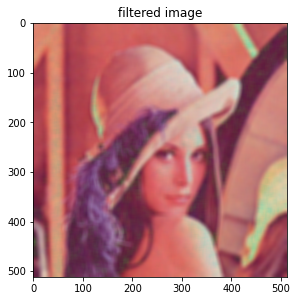

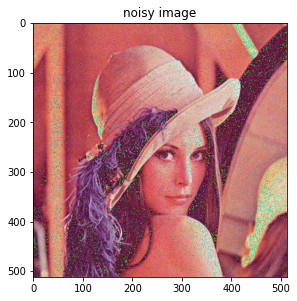

In [14]:
# filter the image using gaussian blur with noise using 11 by 11 kernel
image_filtered=cv2.GaussianBlur(noisy_image,(11,11),sigmaX=10,sigmaY=10)
plot_image(image_filtered,noisy_image,"filtered image","noisy image")

Image Sharpening
Image Sharpening involves smoothing the image and calculating the derivatives. We can accomplish image sharpening by applying the following Kernel.

In [15]:
# Common Kernel for image sharpening
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])

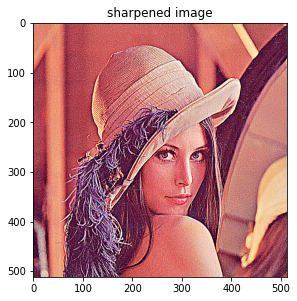

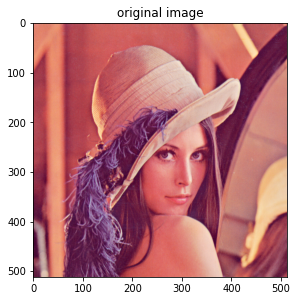

In [16]:
# apply the sharpening using kernel on the origianl image.
sharpened=cv2.filter2D(image,-1,kernel)
plot_image(sharpened,image,"sharpened image","original image")

edges

Edges are where pixel intensities change. The Gradient of a function outputs the rate of change; we can approximate the gradient of a grayscale image with convolution. There are several methods to approximate the gradient, let’s use the Sobel edge detector. This combines several convolutions and finding the magnitude of the result. Consider the following image:

[[181 201 202 ... 103 102  92]
 [171 198 201 ...  94  96  96]
 [175 195 193 ...  87  96  98]
 ...
 [100  97  97 ... 114 113 117]
 [ 94  97  99 ... 111 112 114]
 [ 96  95  98 ... 113 104 109]]


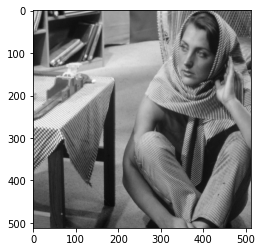

In [17]:
# Loads the image from the specified file
img_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
print(img_gray)
# Renders the image from the array of data, notice how it is 2 diemensional instead of 3 diemensional because it has no color
plt.imshow(img_gray ,cmap='gray')

We smooth the image, this decreases changes that may be caused by noise that would affect the gradient

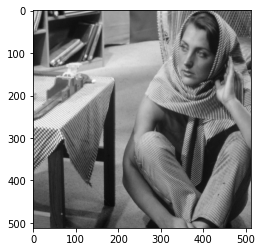

In [18]:
# Filters the images using GaussianBlur on the image with noise using a 3 by 3 kernel 
img_gray=cv2.GaussianBlur(img_gray,(3,3),sigmaX=0.1,sigmaY=0.1)
# renders the filtered image
plt.imshow(img_gray,cmap='gray')

We can approximate the derivative in the X or Y direction using the Sobel function, here are the parameters:

src: input image

ddepth: output image depth, see combinations; in the case of 8-bit input images it will result in truncated derivatives

dx: order of the derivative x

dx: order of the derivative y

ksize size of the extended Sobel kernel; it must be 1, 3, 5, or 7

dx = 1 represents the derivative in the x-direction. The function approximates the derivative by convolving the image with the following kernel

1 0 -1

2 0 -2

1 0 -1

In [19]:
ddepth=cv2.CV_16S
# apply the filter on image in the x direction
grad_x=cv2.Sobel(img_gray,ddepth,dx=1,dy=0,ksize=3)

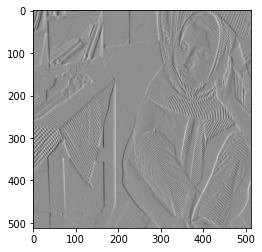

In [20]:
plt.imshow(grad_x,cmap='gray')

dy=1 represents the derivative in the y-direction. The function approximates the derivative by convolving the image with the following kernel

1 2 1

0 0 0

-1 -2 -1

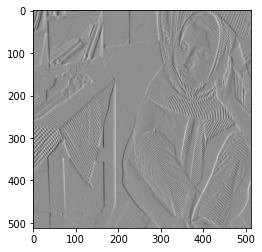

In [21]:
grad_y=cv2.Sobel(img_gray,ddepth,dx=0,dy=1,ksize=3)
plt.imshow(grad_x,cmap='gray')

In [22]:
# We can approximate the gradient by calculating absolute values, and converts the result to 8-bit:
abs_grad_x=cv2.convertScaleAbs(grad_x)
abs_grad_y=cv2.convertScaleAbs(grad_y)

Then apply the function addWeighted to calculates the sum of two arrays as follows:

In [23]:
# Adds the derivative in the X and Y direction
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

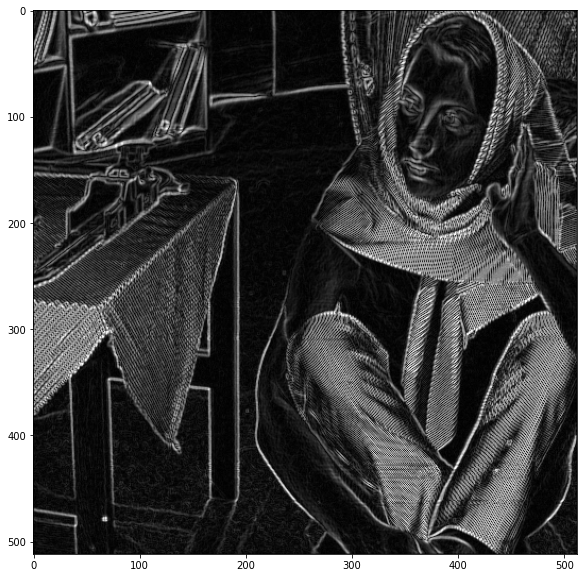

In [24]:
# make the figure bigger and render the image
plt.figure(figsize=(10,10))
plt.imshow(grad,cmap='gray')

Median
Median filters find the median of all the pixels under the kernel area and the central element is replaced with this median value.

We can apply median filters to regular images but let’s see how we can use a median filter to improve segmentation. Consider the cameraman example

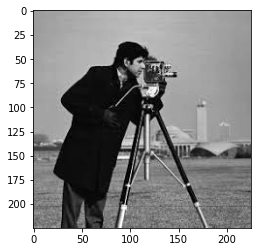

In [25]:
image=cv2.imread('cameraman.jpeg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

Now let's apply a Median Filter by using the medianBlur function. The parameters for this function are src: The image and ksize: Kernel size

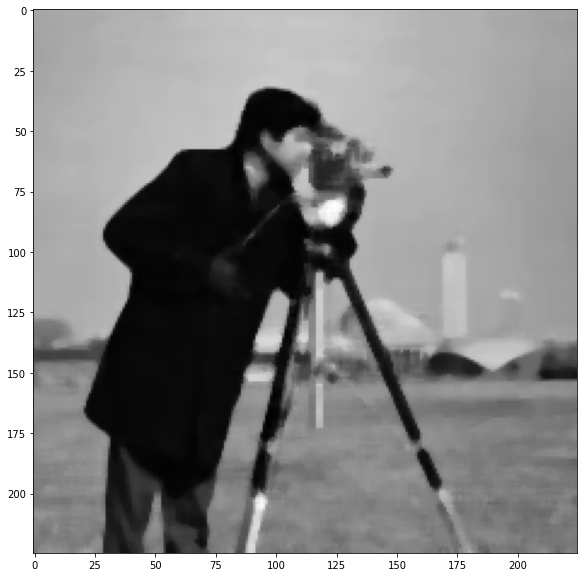

In [27]:
# kernel size of 5
filtered_image=cv2.medianBlur(image,5)
# make the image larger when it renders 
plt.figure(figsize=(10,10))
plt.imshow(filtered_image,cmap='gray')

Threshold Function Parameters¶
src: The image to use thresh: The threshold maxval: The maxval to use type: Type of filtering

The threshold function works by looking at each pixel's grayscale value and assigning a value if it is below the threshold and another value if it is above the threshold. In our example the threshold is 0 (black) and the type is binary inverse so if a value is above the threshold the assigned value is 0 (black) and if it is below or equals the threshold the maxval 255 (white) is used. So if the pixel is 0 black it is assigned 255 (white) and if the pixel is not black then it is assigned black which is what THRESH_BINARY_INV tells OpenCV to do. This is how it would work without THRESH_OTSU.

Since we are using THRESH_OTSU it means that OpenCV will decide an optimal threshold. In our example below the threshold, we provide does not get used in the filter OpenCV will use an optimal one.

threshold used is:  88.0


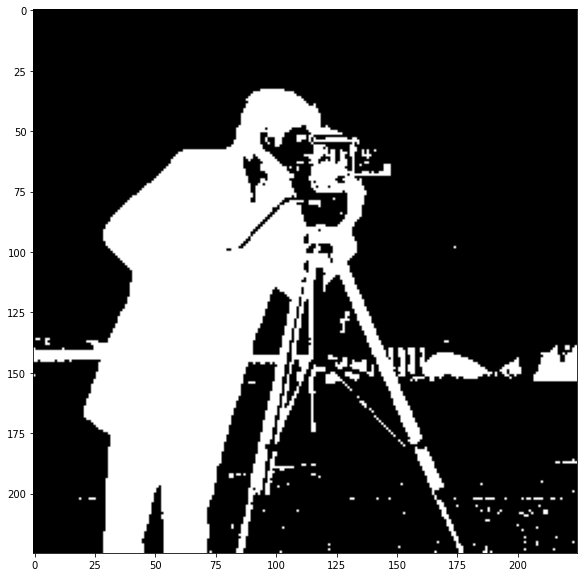

In [28]:
# return ret which is the threshold used and outs which is the image
ret,outs=cv2.threshold(src=image,thresh=0,maxval=255,type=cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
plt.figure(figsize=(10,10))
plt.imshow(outs,cmap='gray')
print("threshold used is: ",ret);